# Predicting Heart Disease using Machine Learning <a id=99></a>

1. [Problem Definition](#1)
2. [Data](#2)
3. [Evaluation](#3)
4. [Features](#4)
    - 4.1 [Heart Disease Data Dictionary](#5)
5. [Preparation](#6)
    - 5.1 [Preparing the tools](#7)
    - 5.2 [Load Data](#8)
    - 5.3 [Data Understanding](#9)
6. [Exploratory Data Analysis](#10)
    - 6.1 [Univariate Analysis](#11)
    - 6.2 [Bivariate Analysis](#12)
7. [Exploratory Data Analysis](#13)
    - 7.1 [Conclusions from the EDA](#14)
    - 7.2 [Packages](#15)
    - 7.3 [Defining the features and target](#16)
    - 7.4 [Train and test split](#17)
8. [Modeling](#18)
    - 8.1 [Model Choices](#19)
    - 8.2 [Model Comparison](#20)
9. [Hyperparameter tuning and cross-validation](#21)
    - 9.1 [Tuning KNeighborsClassifier by hand](#22)
    - 9.2 [Tuning models with with RandomizedSearchCV](#23)
    - 9.3 [Tuning a model with GridSearchCV](#24)
10. [Evaluation](#25)
    - 10.1 [Packages](#26)
    - 10.2 [Packages](#27)
    - 10.3 [Packages](#28)
11. [Feature importance](#29)

### 1. Problem Definition <a id=1></a>
[Back to top](#99)

In this case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because I am going to use a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### 2. Data <a id=2></a>
[Back to top](#99)

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, I have downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

### 3. Evaluation <a id=3></a>
[Back to top](#99)

> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.


### 4. Features <a id=4></a>
[Back to top](#99)

#### 4.1 Heart Disease Data Dictionary <a id=5></a>

The following are the features we'll use to predict our target variable (heart disease or no heart disease):

* **1. age** - age in years 
* **2. sex** - (1 = male; 0 = female) 
* **3. cp** - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* **4. trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
* **5. chol** - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
* **6. fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
* **7. restecg** - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
* **8. thalach** - maximum heart rate achieved 
* **9. exang** - exercise induced angina (1 = yes; 0 = no) 
* **10. oldpeak** - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
* **11. slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* **12. ca** - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
* **13. thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
* **14. target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

### 5. Preparation <a id=6></a>
[Back to top](#99)

#### 5.1 Preparing the tools <a id=7></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### 5.2 Load Data <a id=8></a>

In [2]:
df = pd.read_csv("heart-disease.csv")

#### 5.3 Data Understanding <a id=9></a>

##### 5.3.1 Top 10 rows of our dataframe <a id=7></a>

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


##### 5.3.2 The shape of the data

In [4]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


##### 5.3.3 Check the number of unique values in each column

In [5]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["Unique Counter:"]).transpose()

,Unique Counter:
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


##### 5.3.5 Separating the columns in categorical and continuous

In [6]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["output"]
print("The categorial columns are : ", cat_cols)
print("The continuous columns are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial columns are :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
The continuous columns are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The target variable is :   ['output']


##### 5.3.6 Summary statistics

In [7]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


##### 5.3.7 Missing values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### 5.3.8 Data types

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##### 5.3.9 Duplicates

In [10]:
duplicates_number = df.duplicated().sum()
print("The categorial columns are : ", duplicates_number)

The categorial columns are :  1


##### 5.3.10 Drop duplicate value

In [11]:
df=df.drop_duplicates(keep="first")

**CONCLUSION**: Now our Data is Clean We can do Further Analysis.

### 6. Exploratory Data Analysis <a id=10></a>
[back to top](#99)

#### 6.1 Univariate Analysis <a id=11></a>

##### 6.1.1 Count plot of categorical features

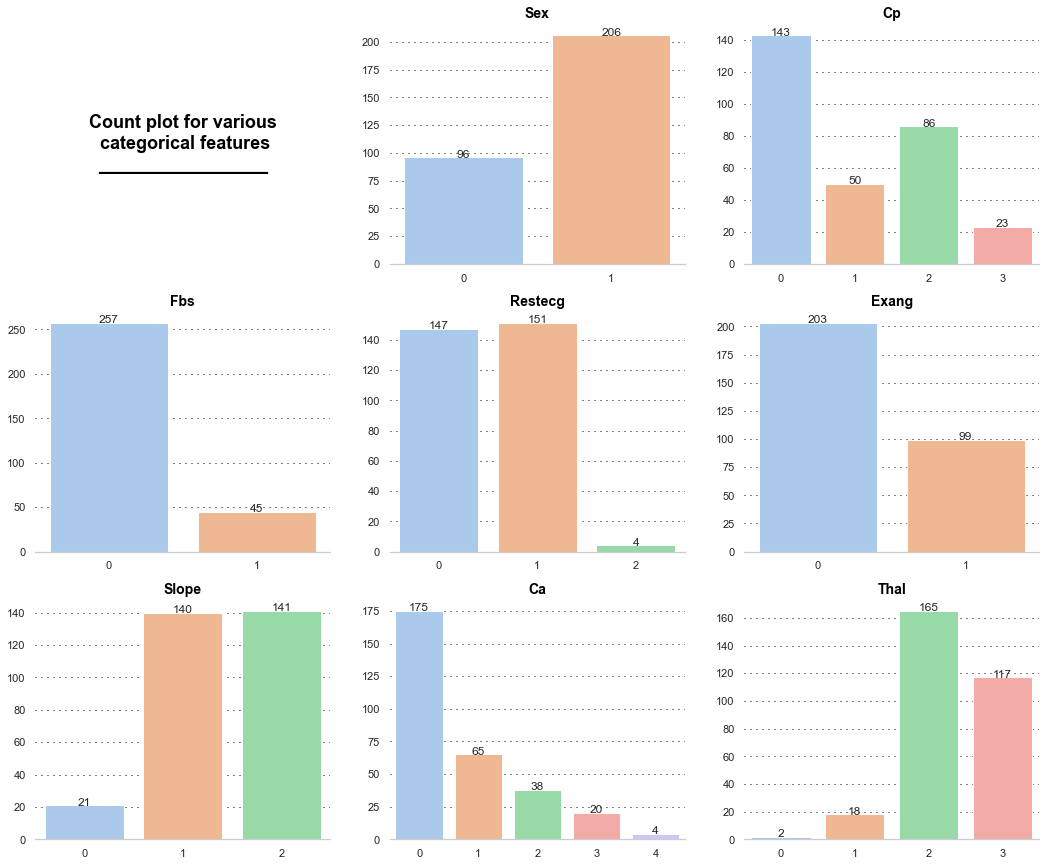

In [12]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3,
                                                                        ncols=3,
                                                                        figsize=(18, 15))
# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False)
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         color="#000000")

# Sex count
ax1.set_title('Sex', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex')
ax1.set_xlabel("")
ax1.set_ylabel("")

# Cp count
ax2.set_title('Cp', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='cp')
ax2.set_xlabel("")
ax2.set_ylabel("")

# Fbs count
ax3.set_title('Fbs', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='fbs')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Restecg count
ax4.set_title('Restecg', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='restecg')
ax4.set_xlabel("")
ax4.set_ylabel("")

# Exang count
ax5.set_title('Exang', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='exang')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Slope count
ax6.set_title('Slope', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='slope')
ax6.set_xlabel("")
ax6.set_ylabel("")

# Ca count
ax7.set_title('Ca', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='ca')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thal count
ax8.set_title('Thal', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thal')
ax8.set_xlabel("")
ax8.set_ylabel("")

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            ax.text(_x, _y, p.get_height(), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)
show_values_on_bars(ax2)
show_values_on_bars(ax3)
show_values_on_bars(ax4)
show_values_on_bars(ax5)
show_values_on_bars(ax6)
show_values_on_bars(ax7)
show_values_on_bars(ax8)


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

##### 6.1.2 Boxen plot of continuous features

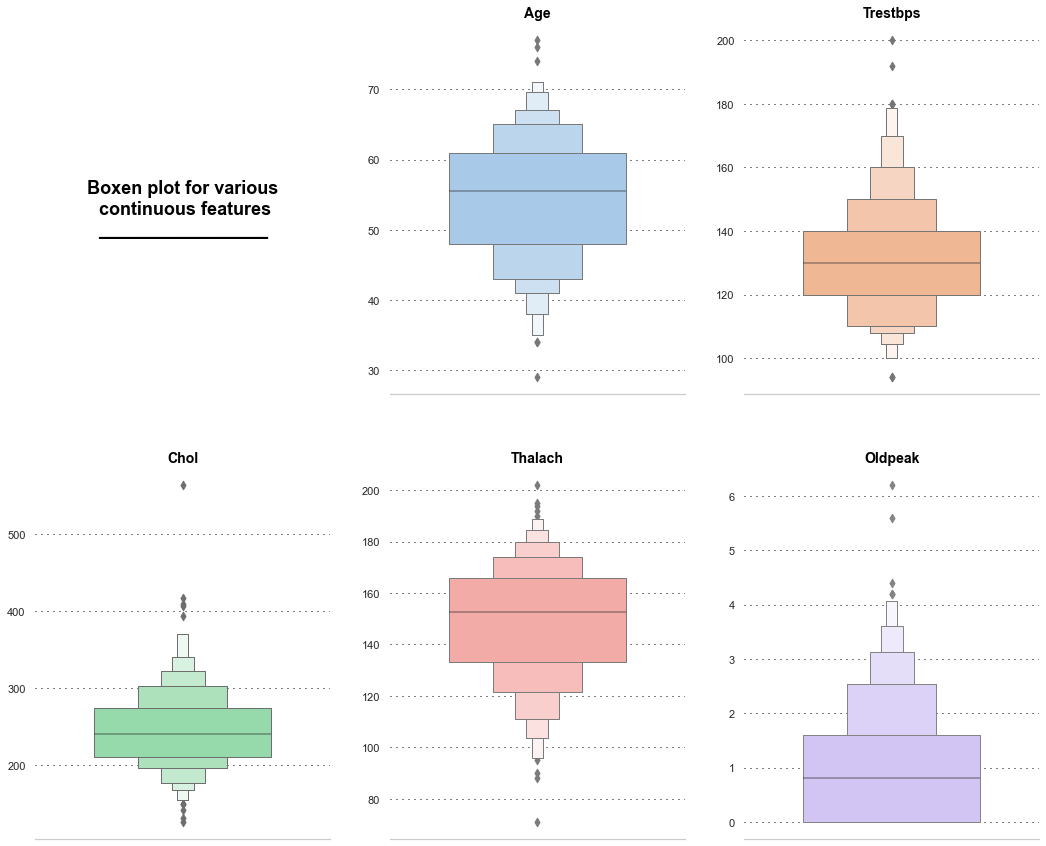

In [13]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2,
                                                       ncols=3,
                                                       figsize=(18, 15))

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False)
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         color="#000000")

# Age 
ax1.set_title('Age', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'], palette=["#9ecaf1"], width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.set_title('Trestbps', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trestbps'], palette=["#ffb386"], width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.set_title('Chol', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#8be4a6"], width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.set_title('Thalach', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalach'], palette=["#ff9f9c"], width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.set_title('Oldpeak', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'], palette=["#cfbdfb"], width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

##### 6.1.3 Count plot of target

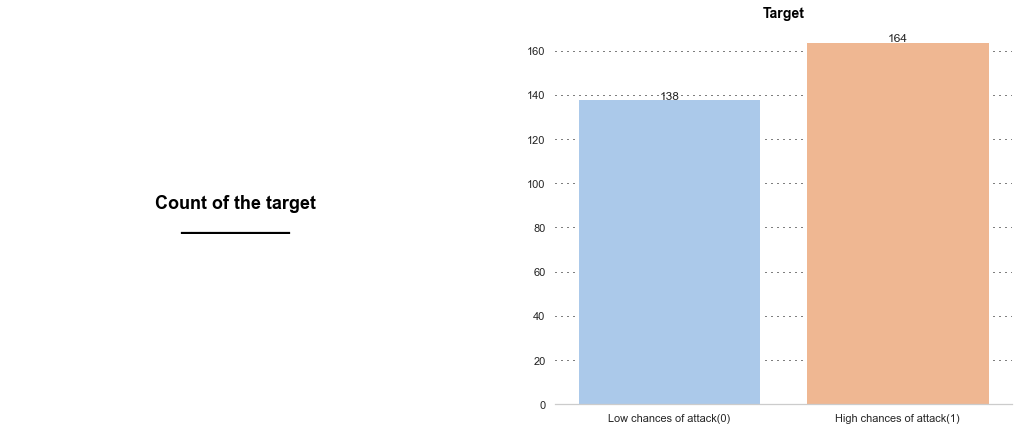

In [14]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.set_title('Target', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': '000000'})
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'target')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            ax.text(_x, _y, p.get_height(), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### 6.2 Bivariate Analysis <a id=12></a>

##### 6.2.1 Correlation matrix of continuous features

In [15]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


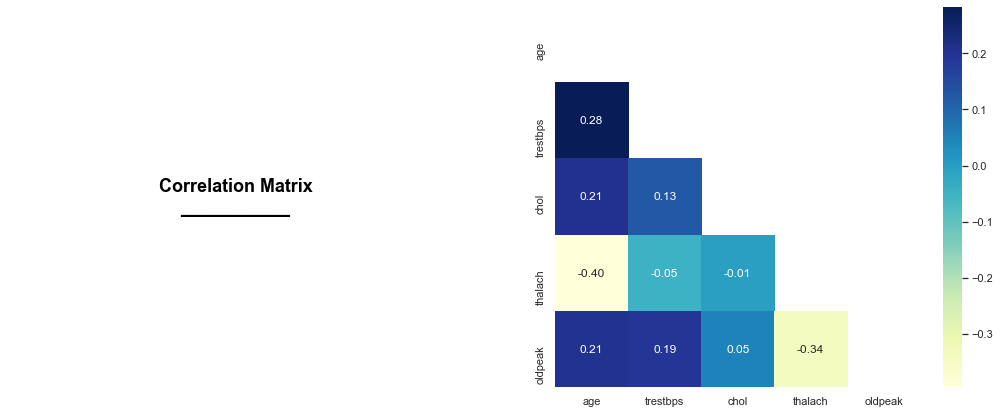

In [16]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

# Title of the plot
ax1.set(ylim=(0.4, 0.8))
ax0.text(0.5,0.5,"Correlation Matrix\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
df_corr = df[con_cols].corr().transpose()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, mask = mask, fmt=".2f", annot=True,cmap='YlGnBu')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

##### 6.2.2 Heatmap of DataFrame

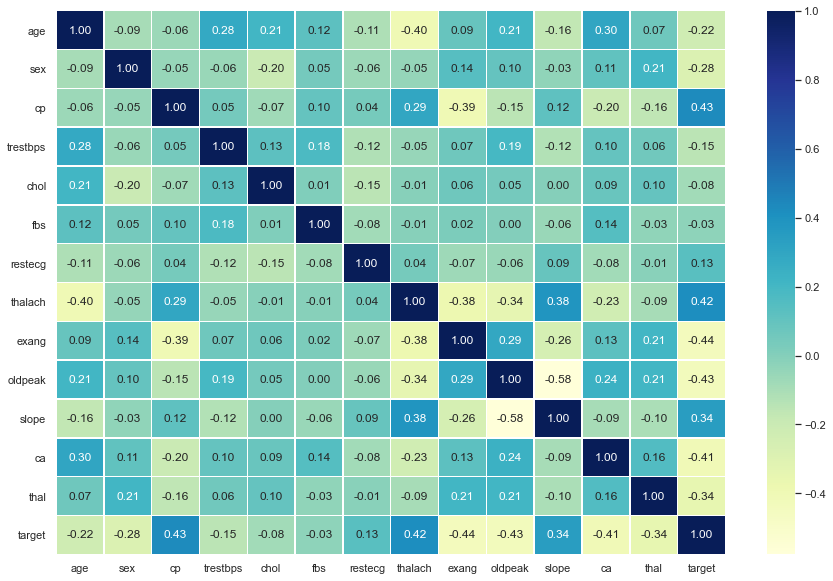

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

#### 6.2.3 Distribution of continuous features according to target variable

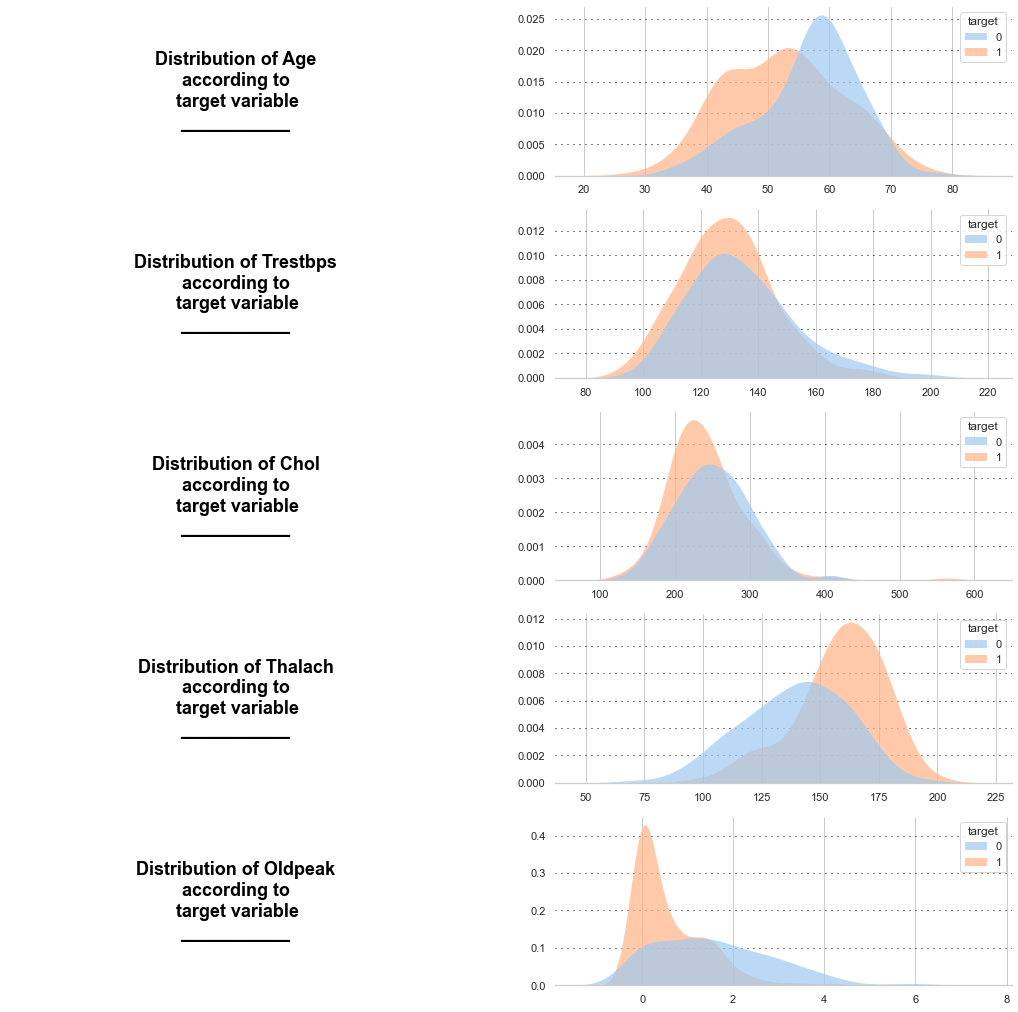

In [18]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(nrows=5,
                                                                                 ncols=2,
                                                                                 figsize=(18, 18))

# Age title
ax0.text(0.5,0.5,"Distribution of Age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.grid(False)
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="target", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trestbps title
ax2.text(0.5,0.5,"Distribution of Trestbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(False)
ax2.tick_params(left=False, bottom=False)

# Trestbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trestbps',hue="target", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of Chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.grid(False)
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="target", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalach title
ax6.text(0.5,0.5,"Distribution of Thalach\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.grid(False)
ax6.tick_params(left=False, bottom=False)

# Thalach
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalach',hue="target", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of Oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.grid(False)
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="target", fill=True,palette=["#9ecaf1","#ffb386"], alpha=.7, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

### 7. Data Preprocessing <a id=13></a>
[Back to top](#99)

#### 7.1 Conclusions from the EDA <a id=14></a>

1. There are no NaN values in the data.
2. The data consists of more than twice the number of people with `sex` = 1 than `sex` = 0.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. The scatterplot heatmap matrix suggests that there might be some correlation between `output` and `cp`, `thalach` and `slope`.
6. It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of `age` to the `output`, it is evident that this isn't the case.
7. According to the distribution plot of `thalach` to the `output`, people with higher maximum heart rate achieved have higher chances of heart attack.
8. According to the distribution plot of `oldpeak` to the `output`, people with lower pevious peak achieved have higher chances of heart attack.

#### 7.2 Packages <a id=15></a>

In [19]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#### 7.3 Defining the features and target <a id=16></a>

In [20]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

#### 7.4 Train and test split <a id=17></a>

In [21]:
# Random seed for reproducibility
np.random.seed(10)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ", X_test.shape)
print("The shape of y_train is      ", y_train.shape)
print("The shape of y_test is       ", y_test.shape)

The shape of X_train is       (241, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (241,)
The shape of y_test is        (61,)


### 8. Modeling <a id=18></a>
[back to top](#99)

#### 8.1 Model choices <a id=19></a>

Now because I have got the data prepared, I can start to fit models. I will be using the following and comparing their results.

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`
4. Decision Tree - `DecisionTreeClassifier()`
5. SVC - `SVC()`

In [22]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVC": SVC()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(19)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [23]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.5737704918032787,
 'Logistic Regression': 0.7704918032786885,
 'Random Forest': 0.7868852459016393,
 'Decision Tree': 0.7213114754098361,
 'SVC': 0.6065573770491803}

#### 8.2 Model Comparison <a id=20></a>

In [24]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare

,KNN,Logistic Regression,Random Forest,Decision Tree,SVC
Accuracy,0.57377,0.770492,0.786885,0.721311,0.606557


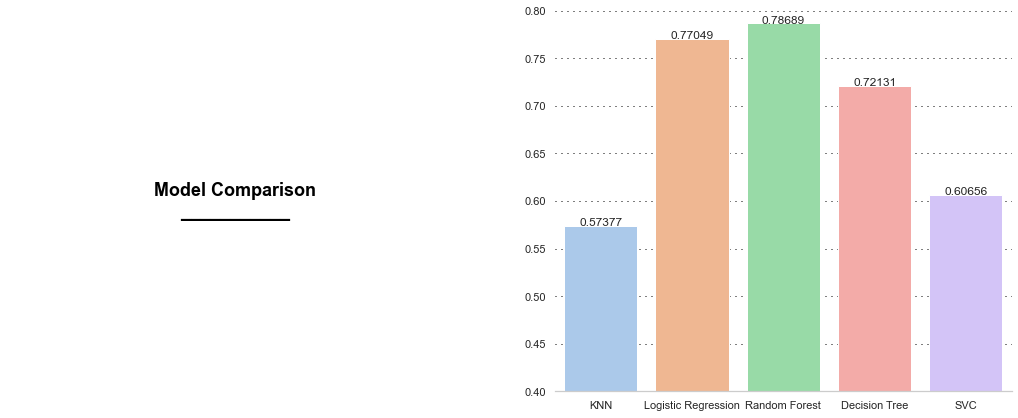

In [25]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

# Title of the plot
ax1.set(ylim=(0.4, 0.8))
ax0.text(0.5,0.5,"Model Comparison\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(data=model_compare)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.5f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

### 9. Hyperparameter tuning and cross-validation <a id=21></a>
[back to top](#99)

To test different hyperparameters, we could use a **validation set** but since I don't have much data, I will use **cross-validation**.

#### 9.1 Tuning KNeighborsClassifier by hand <a id=22></a>

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (`n_neigbors=5`).

In this case I want to check is there a value between 1 and 20 for number of neighbours I can use to get better KNN score result.

In [26]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

# Calculate max score
max_score = round(max(test_scores)*100, 2)

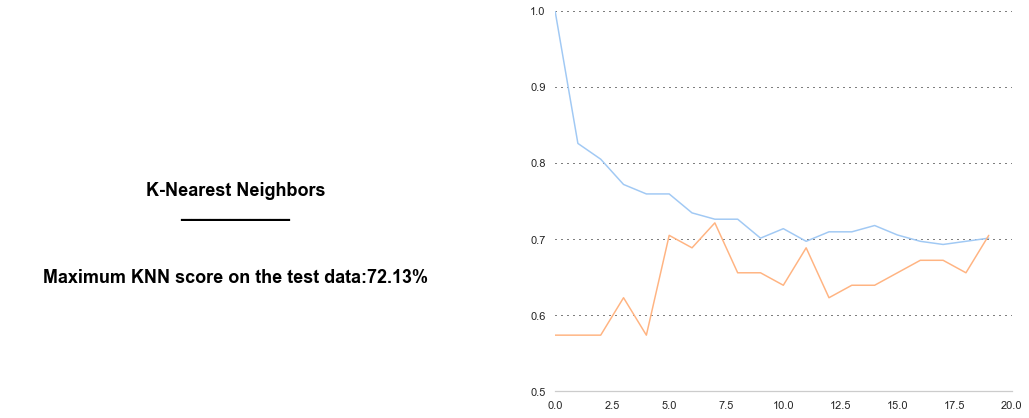

In [27]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

# Title of the plot
ax0.text(0.5,0.5,"K-Nearest Neighbors\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

max_text = "Maximum KNN score on the test data:"
max_perc = "%"
completeText = [max_text, max_score, max_perc]

textIn = ''.join(map(str, completeText))

# Title for max value
ax0.text(0.5, 0.3, textIn ,
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18,
         fontweight='bold',
         color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.set(ylim=(0.5, 1))
ax1.set(xlim=(0, 20))
ax1.grid(False)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.lineplot(data=train_scores)
sns.lineplot(data=test_scores)
ax1.set_xlabel("")
ax1.set_ylabel("")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

Looking at the graph,`n_neighbors = 8` seems best.

Even knowing this, the `KNN`'s model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, I will discard `KNN` and focus on the other two.

We've tuned `KNN` by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

#### 9.2 Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)<a id=23></a>

In [28]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 50, 80),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(500, 800, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(5, 15, 2),
           "min_samples_leaf": np.arange(5, 15, 2)}

In [29]:
# Setup random seed
np.random.seed(10)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [30]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.9549661430912595e+21}

In [31]:
# Evaluate the randomized search for LogisticRegression
rs_log_reg.score(X_test, y_test)

0.7868852459016393

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [32]:
# Setup random seed
np.random.seed(10)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


In [33]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 11,
 'min_samples_leaf': 13,
 'max_depth': None}

In [34]:
# Evaluate the randomized search for RandomForest
rs_rf.score(X_test, y_test)

0.8032786885245902

#### 9.3 Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) <a id=24></a>

In [35]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(600, 800, 50),
           "max_depth": [10],
           "min_samples_split": np.arange(10, 20, 2),
           "min_samples_leaf": np.arange(10, 20, 2)}

# Setup grid hyperparameter search for LogisticRegression
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 11.0min finished


In [36]:
# Check the best parameters
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 14,
 'min_samples_split': 12,
 'n_estimators': 750}

In [37]:
# Evaluate the grid search for RandomForest
gs_rf.score(X_test, y_test)

0.819672131147541

### 10. Evaluation <a id=25></a>
[back to top](#99)

In [38]:
# Make preidctions on test data
y_preds = gs_rf.predict(X_test)

In [39]:
y_preds

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

##### 10.1 Roc Curve and Auc Scores <a id=26></a>

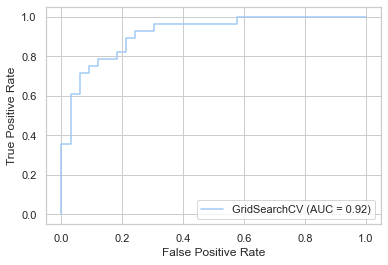

In [41]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_rf, X_test, y_test);

#### 10.2 Confusion Matrix <a id=27></a>

In [42]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[23 10]
 [ 1 27]]


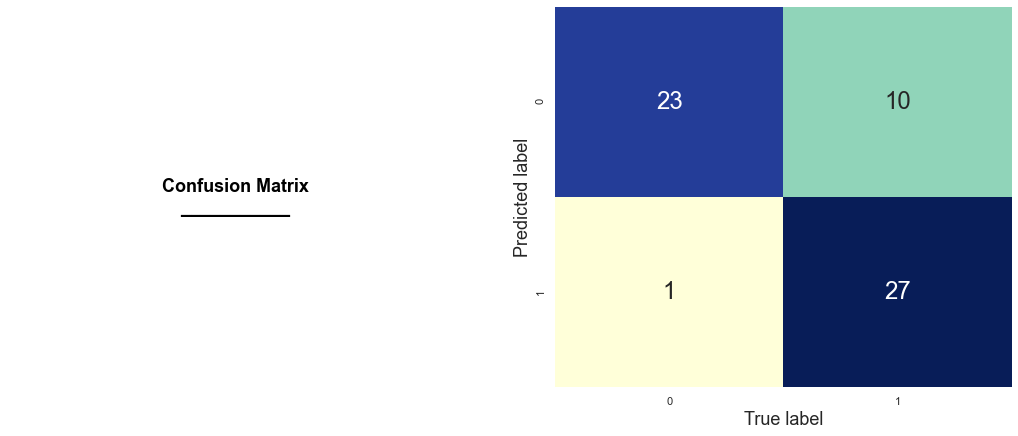

In [43]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

# Title of the plot
ax1.set(ylim=(0.4, 0.8))
ax0.text(0.5,0.5,"Confusion Matrix\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.set(font_scale=2)
ax1 = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True, 
                 cbar=False,
                 cmap='YlGnBu')
ax1.set_xlabel("True label", fontsize=18)
ax1.set_ylabel("Predicted label", fontsize=18)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### 10.3 Classification Report <a id=28></a>

In [44]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81        33
           1       0.73      0.96      0.83        28

    accuracy                           0.82        61
   macro avg       0.84      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61



Ok, now I have got a few deeper insights on our model. But these were all calculated using a single training and test set.

I will take the best model along with the best hyperparameters and use `cross_val_score()` along with various `scoring` parameter values.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [45]:
# Check best hyperparameters
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 14,
 'min_samples_split': 12,
 'n_estimators': 750}

In [46]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = RandomForestClassifier(max_depth = 10,
 min_samples_leaf = 10,
 min_samples_split = 14,
 n_estimators = 650)

Now I have got an instantiated classifier, let's find some cross-validated metrics.

In [47]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.83606557, 0.86885246, 0.83333333, 0.86666667, 0.78333333])

Since there are 5 metrics here, let's take the average.

In [48]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8376502732240437

I will also do the same for other classification metrics.

In [49]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8316407982685572

In [50]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8719696969696968

In [51]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8501126952757388

In [52]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.83765,0.831641,0.87197,0.850113


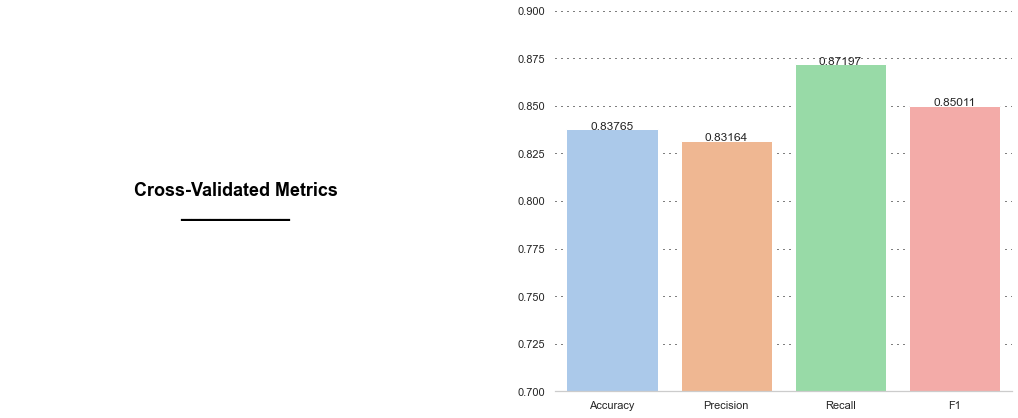

In [53]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 7))

# Title of the plot
ax0.text(0.5,0.5,"Cross-Validated Metrics\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.set(ylim=(0.7, 0.9))
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(data=cv_metrics)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.5f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

### 11. Feature importance <a id=29></a>
[back to top](#99)

In [54]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [55]:
# Check feature importances
clf.feature_importances_

array([0.04707718, 0.04132702, 0.16033311, 0.01873969, 0.02618147,
       0.00048404, 0.00880136, 0.1319383 , 0.08538831, 0.11427034,
       0.06359661, 0.17236279, 0.12949976])

In [56]:
feat_importances_s = pd.Series(clf.feature_importances_, index=X.columns)

In [57]:
feat_importances_df = feat_importances_s.to_frame('value').T
feat_importances_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
value,0.047077,0.041327,0.160333,0.01874,0.026181,0.000484,0.008801,0.131938,0.085388,0.11427,0.063597,0.172363,0.1295


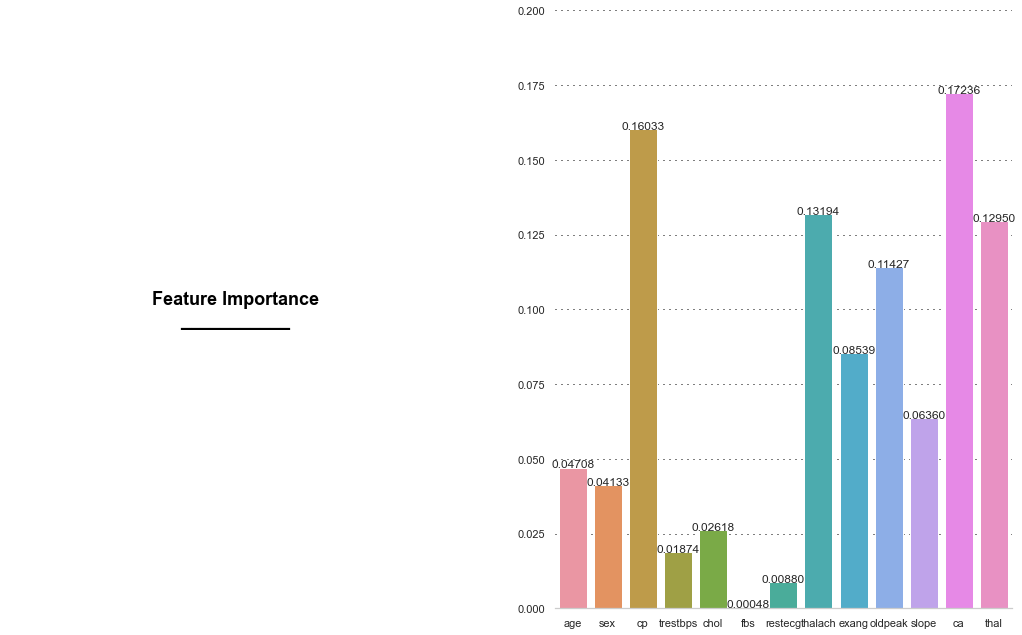

In [58]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(18, 11))

# Title of the plot
ax0.text(0.5,0.5,"Feature Importance\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.grid(False)

# Target Count
ax1.set(ylim=(0, 0.2))
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.barplot(data=feat_importances_df)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.5f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax1)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

<h2 align="center">Thank you for reading this work!<br> Any feedback on this work would be very grateful.<br> If you liked this notebook please upvote.</h2>
